In [11]:
# Algorithmic Strategies Mini Project
Course: Design & Analysis of Algorithms Lab  
Name: Mahi 
Repo: algo-strategies-mini-project

Contents
1. Setup & environment check  
2. Problem 1 - TV Commercial Scheduling (Greedy / Job Sequencing)  
3. Problem 2 - 0/1 Knapsack (Dynamic Programming)  
4. Problem 3 - Sudoku Solver (Backtracking)  
5. Problem 4 - Password Cracking (Brute Force)  
6. Profiling & Plots  
7. Final Summary & Comparison Table

In [ ]:
# Setup & imports
import time
import itertools
import math
import random
import os
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
import psutil
import tracemalloc
from collections import namedtuple

# Make images directory if not exists
os.makedirs("images", exist_ok=True)
%matplotlib inline


In [12]:
# %% Profiling helpers
def time_and_memory(func, *args, **kwargs):
    """
    Run func(*args, **kwargs) and return (result, elapsed_time_seconds, peak_memory_MB).
    Uses tracemalloc for more precise peak memory inside Python and time.perf_counter for timing.
    """
    tracemalloc.start()
    start = time.perf_counter()
    result = func(*args, **kwargs)
    elapsed = time.perf_counter() - start
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    peak_mb = peak / (1024*1024)
    return result, elapsed, peak_mb

def time_only(func, *args, **kwargs):
    start = time.perf_counter()
    res = func(*args, **kwargs)
    return res, time.perf_counter() - start


In [ ]:
Description: Given (id, deadline, profit) schedule non-overlapping ads to maximize profit.
Strategy: Greedy — sort by profit and place each job in latest available slot before its deadline.


In [13]:
# %% Problem 1 implementation: Job sequencing (Greedy)
Ad = namedtuple("Ad", ["id", "deadline", "profit"])

def greedy_job_sequencing(ads):
    """
    ads: list of Ad(id, deadline, profit)
    returns: (selected_ads_list_in_slot_order, total_profit)
    """
    if not ads:
        return [], 0
    # Sort by profit descending
    ads_sorted = sorted(ads, key=lambda x: x.profit, reverse=True)
    max_deadline = max(ad.deadline for ad in ads_sorted)
    slots = [None] * max_deadline  # slots indexed 0..max_deadline-1
    total_profit = 0
    for ad in ads_sorted:
        # place ad in latest free slot before deadline
        for s in range(min(max_deadline, ad.deadline) - 1, -1, -1):
            if slots[s] is None:
                slots[s] = ad
                total_profit += ad.profit
                break
    selected = [ad for ad in slots if ad is not None]
    return selected, total_profit

# Sample test
sample_ads = [Ad("A1", 2, 100), Ad("A2", 1, 19), Ad("A3", 2, 27),
              Ad("A4", 1, 25), Ad("A5", 3, 15)]
print(greedy_job_sequencing(sample_ads))


([Ad(id='A3', deadline=2, profit=27), Ad(id='A1', deadline=2, profit=100), Ad(id='A5', deadline=3, profit=15)], 142)


n=100: time=0.00154s, peak_mem=0.001MB
n=500: time=0.00487s, peak_mem=0.012MB
n=1000: time=0.00778s, peak_mem=0.023MB
n=2000: time=0.02088s, peak_mem=0.046MB
n=5000: time=0.05434s, peak_mem=0.114MB


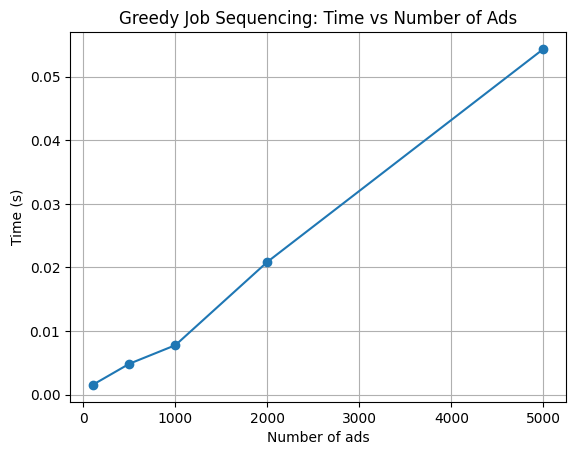

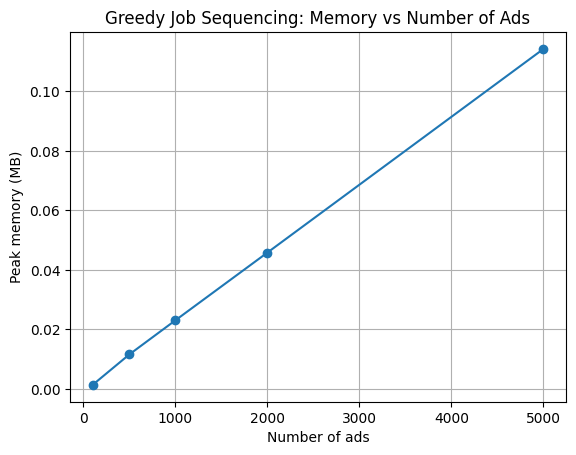

In [14]:
# %% Problem 1: Time/memory experiments (vary number of ads)
from collections import namedtuple
Ad = namedtuple("Ad", ["id", "deadline", "profit"])

def generate_random_ads(n, max_deadline=20, max_profit=500):
    ads = []
    for i in range(n):
        d = random.randint(1, max_deadline)
        p = random.randint(1, max_profit)
        ads.append(Ad(f"ad{i}", d, p))
    return ads

sizes = [100, 500, 1000, 2000, 5000]
times = []
mems = []
for n in sizes:
    ads = generate_random_ads(n)
    _, t, m = time_and_memory(greedy_job_sequencing, ads)
    times.append(t)
    mems.append(m)
    print(f"n={n}: time={t:.5f}s, peak_mem={m:.3f}MB")

# plot
plt.figure()
plt.plot(sizes, times, marker='o')
plt.xlabel("Number of ads")
plt.ylabel("Time (s)")
plt.title("Greedy Job Sequencing: Time vs Number of Ads")
plt.grid(True)
plt.savefig("images/greedy_time.png")
plt.show()

plt.figure()
plt.plot(sizes, mems, marker='o')
plt.xlabel("Number of ads")
plt.ylabel("Peak memory (MB)")
plt.title("Greedy Job Sequencing: Memory vs Number of Ads")
plt.grid(True)
plt.savefig("images/greedy_memory.png")
plt.show()


In [ ]:
Description: Given weights (costs) and values (profits) choose subset within budget to maximize profit.
Strategy: Bottom-up DP table.


In [15]:
# %% Problem 2 implementation: 0/1 Knapsack (bottom-up)
def knapsack_01(values, weights, capacity):
    n = len(values)
    # dp[i][w] = max value for first i items with capacity w
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        val = values[i-1]
        wt = weights[i-1]
        for w in range(capacity + 1):
            if wt <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w-wt] + val)
            else:
                dp[i][w] = dp[i-1][w]
    # reconstruct selected items
    res = dp[n][capacity]
    w = capacity
    selected = []
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i-1][w]:
            selected.append(i-1)
            w -= weights[i-1]
    selected.reverse()
    return res, selected, dp

# Sample test
vals = [60, 100, 120]
wts = [10, 20, 30]
cap = 50
print(knapsack_01(vals, wts, cap))


(220, [1, 2], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 220]])


n=10: time=0.00075s, peak_mem=0.004MB
n=50: time=0.07232s, peak_mem=0.278MB
n=100: time=0.38842s, peak_mem=0.929MB
n=200: time=1.95747s, peak_mem=4.210MB


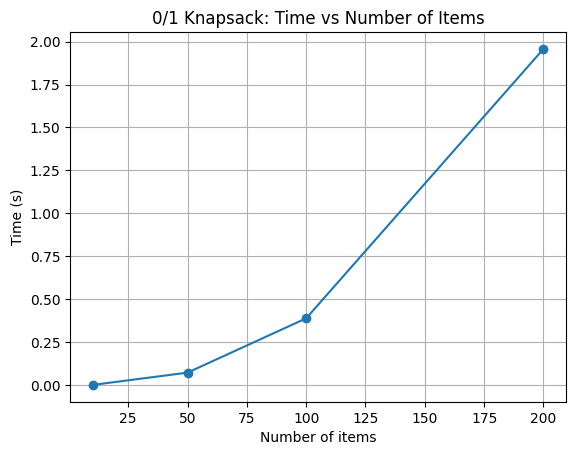

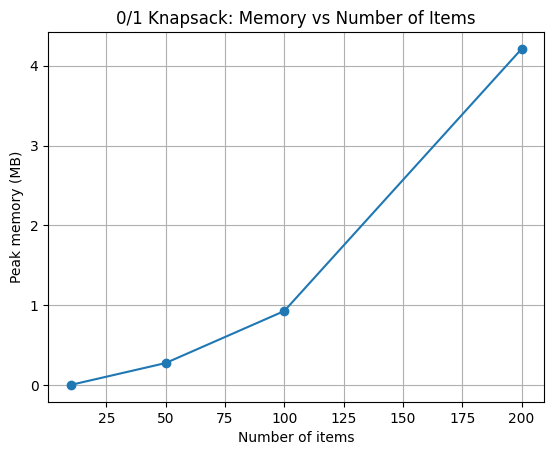

In [16]:
# %% Problem 2: Time/memory experiments (vary capacity and items)
def random_knapsack_instance(n_items, max_weight=20, max_value=100):
    weights = [random.randint(1, max_weight) for _ in range(n_items)]
    values = [random.randint(1, max_value) for _ in range(n_items)]
    capacity = int(sum(weights) * 0.4)  # some fraction
    return values, weights, capacity

sizes = [10, 50, 100, 200]  # number of items
times = []
mems = []
for n in sizes:
    vals, wts, cap = random_knapsack_instance(n)
    _, t, m = time_and_memory(knapsack_01, vals, wts, cap)
    times.append(t)
    mems.append(m)
    print(f"n={n}: time={t:.5f}s, peak_mem={m:.3f}MB")

plt.figure()
plt.plot(sizes, times, marker='o')
plt.xlabel("Number of items")
plt.ylabel("Time (s)")
plt.title("0/1 Knapsack: Time vs Number of Items")
plt.grid(True)
plt.savefig("images/knapsack_time.png")
plt.show()

plt.figure()
plt.plot(sizes, mems, marker='o')
plt.xlabel("Number of items")
plt.ylabel("Peak memory (MB)")
plt.title("0/1 Knapsack: Memory vs Number of Items")
plt.grid(True)
plt.savefig("images/knapsack_memory.png")
plt.show()


In [ ]:
Description: Solve a 9x9 Sudoku with backtracking and constraint checking.


In [17]:
# %% Problem 3 implementation: Sudoku solver with backtracking
def find_empty(board):
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return i, j
    return None

def valid(board, row, col, num):
    # check row
    if any(board[row][c] == num for c in range(9)): return False
    # check col
    if any(board[r][col] == num for r in range(9)): return False
    # check 3x3 box
    box_r, box_c = 3*(row//3), 3*(col//3)
    for r in range(box_r, box_r+3):
        for c in range(box_c, box_c+3):
            if board[r][c] == num:
                return False
    return True

def sudoku_backtrack(board):
    empty = find_empty(board)
    if not empty:
        return True  # solved
    r, c = empty
    for num in range(1, 10):
        if valid(board, r, c, num):
            board[r][c] = num
            if sudoku_backtrack(board):
                return True
            board[r][c] = 0
    return False

# Sample sudoku (0 denotes empty)
sample_board = [
    [5,3,0,0,7,0,0,0,0],
    [6,0,0,1,9,5,0,0,0],
    [0,9,8,0,0,0,0,6,0],
    [8,0,0,0,6,0,0,0,3],
    [4,0,0,8,0,3,0,0,1],
    [7,0,0,0,2,0,0,0,6],
    [0,6,0,0,0,0,2,8,0],
    [0,0,0,4,1,9,0,0,5],
    [0,0,0,0,8,0,0,7,9],
]
board_copy = [row[:] for row in sample_board]
res, t = time_only(sudoku_backtrack, board_copy)
print("Solved:", res, "Time:", t)
print(np.array(board_copy))


Solved: True Time: 0.16040999977849424
[[5 3 4 6 7 8 9 1 2]
 [6 7 2 1 9 5 3 4 8]
 [1 9 8 3 4 2 5 6 7]
 [8 5 9 7 6 1 4 2 3]
 [4 2 6 8 5 3 7 9 1]
 [7 1 3 9 2 4 8 5 6]
 [9 6 1 5 3 7 2 8 4]
 [2 8 7 4 1 9 6 3 5]
 [3 4 5 2 8 6 1 7 9]]


blanks=10: time=0.00122s, peak_mem=0.001MB
blanks=20: time=0.00246s, peak_mem=0.001MB
blanks=30: time=0.00358s, peak_mem=0.002MB
blanks=40: time=0.00449s, peak_mem=0.002MB
blanks=50: time=2.44870s, peak_mem=0.006MB
blanks=60: time=75.51464s, peak_mem=0.005MB
blanks=64: time=0.10705s, peak_mem=0.003MB


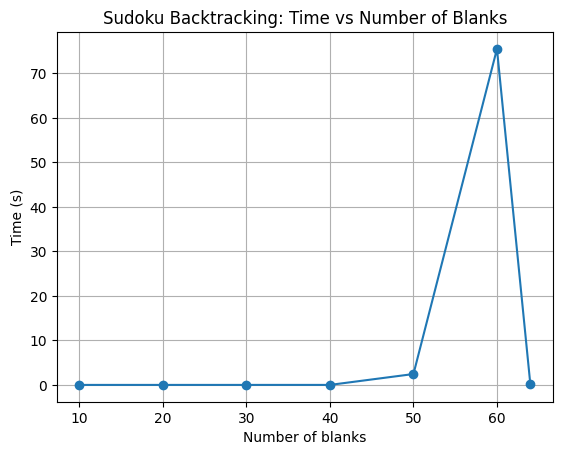

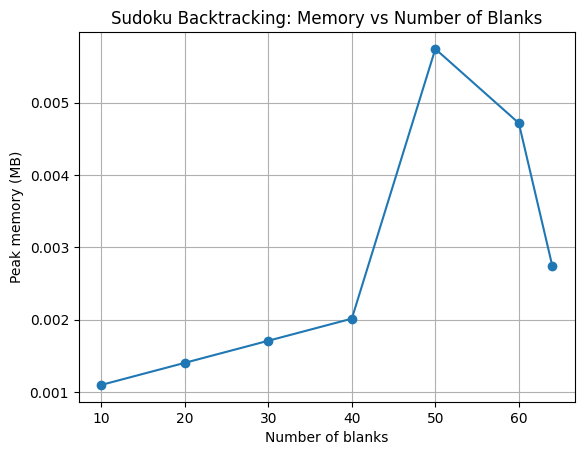

In [18]:
# %% Problem 3: Time/memory experiments vs number of blanks
def make_sudoku_with_k_blanks(k):
    # start from a valid solved sudoku (we will use a known solution)
    solved = [
        [5,3,4,6,7,8,9,1,2],
        [6,7,2,1,9,5,3,4,8],
        [1,9,8,3,4,2,5,6,7],
        [8,5,9,7,6,1,4,2,3],
        [4,2,6,8,5,3,7,9,1],
        [7,1,3,9,2,4,8,5,6],
        [9,6,1,5,3,7,2,8,4],
        [2,8,7,4,1,9,6,3,5],
        [3,4,5,2,8,6,1,7,9],
    ]
    # randomly blank k cells
    coords = [(i,j) for i in range(9) for j in range(9)]
    random.shuffle(coords)
    board = [row[:] for row in solved]
    for i in range(k):
        r,c = coords[i]
        board[r][c] = 0
    return board

blanks = [10, 20, 30, 40, 50, 60, 64]
times = []
mems = []
for b in blanks:
    bd = make_sudoku_with_k_blanks(b)
    bd_copy = [row[:] for row in bd]
    _, t, m = time_and_memory(sudoku_backtrack, bd_copy)
    times.append(t)
    mems.append(m)
    print(f"blanks={b}: time={t:.5f}s, peak_mem={m:.3f}MB")

plt.figure()
plt.plot(blanks, times, marker='o')
plt.xlabel("Number of blanks")
plt.ylabel("Time (s)")
plt.title("Sudoku Backtracking: Time vs Number of Blanks")
plt.grid(True)
plt.savefig("images/sudoku_time.png")
plt.show()

plt.figure()
plt.plot(blanks, mems, marker='o')
plt.xlabel("Number of blanks")
plt.ylabel("Peak memory (MB)")
plt.title("Sudoku Backtracking: Memory vs Number of Blanks")
plt.grid(True)
plt.savefig("images/sudoku_memory.png")
plt.show()


In [ ]:
Description: Bruteforce try all combinations from charset until password found.
Strategy: itertools.product generation of combinations per length.


In [19]:
# %% Problem 4 implementation: brute force password cracking
def brute_force_crack(target, charset):
    attempts = 0
    # try lengths from 1 .. len(target)
    for length in range(1, len(target) + 1):
        for comb in itertools.product(charset, repeat=length):
            attempts += 1
            s = ''.join(comb)
            if s == target:
                return s, attempts
    return None, attempts

# small sample
target = "ab1"
charset = "ab1"
print(brute_force_crack(target, charset))


('ab1', 18)


L=1: time=0.00003s, peak_mem=0.000MB, attempts approx=6
L=2: time=0.00008s, peak_mem=0.000MB, attempts approx=36
L=3: time=0.00045s, peak_mem=0.000MB, attempts approx=216
L=4: time=0.00675s, peak_mem=0.000MB, attempts approx=1296
L=5: time=0.04251s, peak_mem=0.000MB, attempts approx=7776


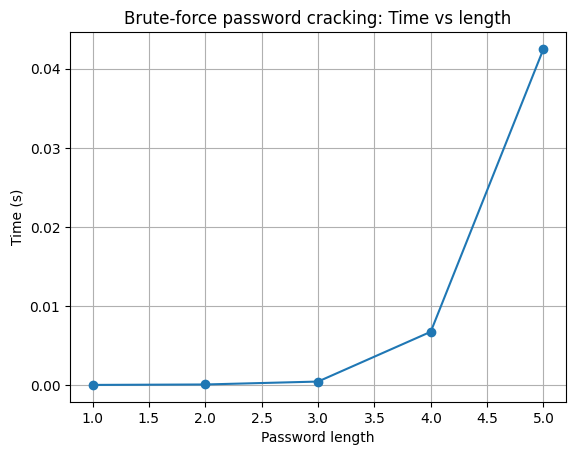

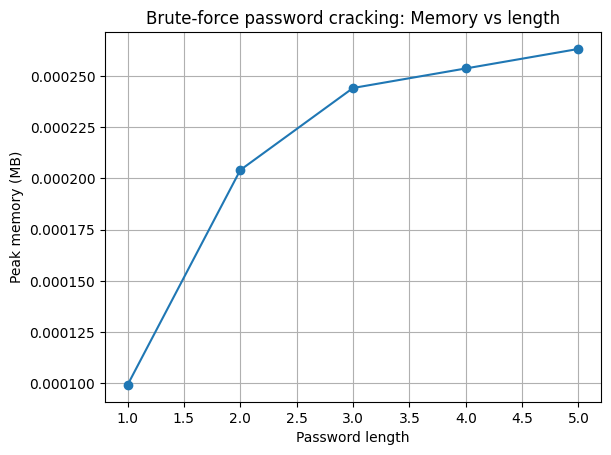

In [21]:
# %% Problem 4: Time experiments vs password length (small charset)
charset = 'abc123'
lengths = [1,2,3,4,5]  # careful: growth is charset^length; don't go too high in notebook
times = []
mems = []
for L in lengths:
    # choose a target that's last lexicographically of this length to simulate worst-case
    target = ''.join([charset[-1]] * L)
    func = lambda: brute_force_crack(target, charset)
    _, t, m = time_and_memory(brute_force_crack, target, charset)
    times.append(t)
    mems.append(m)
    print(f"L={L}: time={t:.5f}s, peak_mem={m:.3f}MB, attempts approx={len(charset)**L}")

plt.figure()
plt.plot(lengths, times, marker='o')
plt.xlabel("Password length")
plt.ylabel("Time (s)")
plt.title("Brute-force password cracking: Time vs length")
plt.grid(True)
plt.savefig("images/bruteforce_time.png")
plt.show()

plt.figure()
plt.plot(lengths, mems, marker='o')
plt.xlabel("Password length")
plt.ylabel("Peak memory (MB)")
plt.title("Brute-force password cracking: Memory vs length")
plt.grid(True)
plt.savefig("images/bruteforce_memory.png")
plt.show()


In [ ]:
## Summary table (short)
| Problem                      |   Strategy               |   Time Complexity                |   Space Complexity             |     Application Domain      |    Key Notes / Insights   |
|------------------------------|--------------------------|----------------------------------|--------------------------------|-----------------------------|---------------------------|
| TV Commercial Scheduling     | Greedy (Job Sequencing)  | O(n log n + n × D)  ≈ O(n log n) | O(D)                           | Media & Advertisement       | Sort by profit; schedule ads before deadline to maximize revenue |
| 0/1 Knapsack Problem         | Dynamic Programming      | O(n × W)                         | O(n × W) (optimizable to O(W)) | Budget / Investment Planning| Select projects/items for max profit under fixed budget |
| Sudoku Solver                | Backtracking             | Exponential in number of blanks  | O(N) (stack depth ≤ empty cells)| Gaming / Puzzle Solvers    | Recursive trial & error with constraint satisfaction |
| Password Cracking (Naïve)    | Brute Force              | O(|charset|^L) (exponential)     | O(1)                           | Cybersecurity / Ethical Hacking| Tries all combinations until match is found |
